# PROJET 03: Concevez une application au service de la santé publique

- L'objectif de ce projet est de **concevoir une application au service de la santé publique**.





 Nous devons utiliser la base de données OpenFoodFacts pour trouver des idées innovantes d’applications en lien avec l'alimentation.


## Exploration du DataFrame 'df_appli_clean'

Notre DataFrame est maintenant complètement nettoyé et renseigné.
- Nous allons maintenant l'explorer à travers différentes analyse univariés
et bivariés ainsi que plusieurs études statistiques.

Voici les étapes de notre analyse :

 -  Analyse des corrélations entre features
 -  Analyse univariés et bi-variés
 -  Analyse de la Variance (Aussi appelé ANOVA pour ANalysis Of VAriance)
 -  Analyse en Composante Principale (ACP)

## Chargement des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import decomposition, preprocessing
from wordcloud import WordCloud, STOPWORDS
import math
import pickle


%matplotlib inline

## Chargement des données


###  import du DataFrame nettoyé

In [7]:

#importation de la donnée
df_appli_clean= pd.read_csv('openfoodfacts_clean.csv', sep='\t')
df_appli_clean.head()

C:\Users\karim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,image_url,product_name,pnns_groups_1,pnns_groups_2,main_category_fr,brands,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nb_ingredients_huile_palm,sel
0,5200016,http://fr.openfoodfacts.org/images/products/00...,lentilles vertes,Cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,Bertrand Lejeune,0.0,A,1501.0,2.9,0.6,65.0,3.4,0.0,9.40,0.508772,0.0,0.4000
1,7730009,http://fr.openfoodfacts.org/images/products/00...,Biscuits sablés fourrage au cacao,Sugary snacks,Biscuits and cakes,Sablés,St Michel,3.0,C,1928.0,21.0,9.4,59.0,39.0,0.0,5.80,5.501934,1.0,0.2400
2,10090206,http://fr.openfoodfacts.org/images/products/00...,Thé de Noël aromatisé orange-cannelle,Beverages,Non-sugared beverages,Thés,Alice Délice,0.0,A,184.0,0.0,0.0,10.0,9.3,0.0,0.23,0.508772,0.0,0.0100
3,40608754,http://fr.openfoodfacts.org/images/products/00...,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,Sodas,Pepsi,2.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.00,13.000000,0.0,0.0254
4,87177756,http://fr.openfoodfacts.org/images/products/00...,7Up,Beverages,Sweetened beverages,Sodas aux fruits,"7Up,Pepsico",3.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.00,13.000000,0.0,0.1000


### Corrélation
**Affichage des informations de corrélation**
- Affiche les corrélations entre chaque colonne 2 à 2. Les valeurs vont de 1 à -1 :

  - 1 indique que deux colonnes sont très corrélées entre-elles
  - 0 indique qu'il n'existe pas de corrélation
  -1 indique que les deux colonnes sont anti-corrélé entre-elles

In [8]:
df_appli_clean.corr()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nb_ingredients_huile_palm,sel
additives_n,1.000000,0.067482,0.011691,0.011493,0.123140,0.126689,-0.044140,-0.030159,0.207370,0.484162,0.064806
energy_100g,0.067482,1.000000,0.759555,0.601615,0.565483,0.375456,0.211265,0.210617,0.610545,0.214890,0.051031
fat_100g,0.011691,0.759555,1.000000,0.708634,-0.020269,0.042937,0.016783,0.137928,0.537679,0.112438,0.107904
saturated-fat_100g,0.011493,0.601615,0.708634,1.000000,0.024844,0.142918,-0.000962,0.150549,0.609438,0.120961,0.046907
carbohydrates_100g,0.123140,0.565483,-0.020269,0.024844,1.000000,0.631558,0.262841,-0.112611,0.276446,0.225168,-0.152050
sugars_100g,0.126689,0.375456,0.042937,0.142918,0.631558,1.000000,0.054674,-0.259869,0.463796,0.143973,-0.208493
fiber_100g,-0.044140,0.211265,0.016783,-0.000962,0.262841,0.054674,1.000000,0.103920,-0.028769,0.034577,-0.043480
proteins_100g,-0.030159,0.210617,0.137928,0.150549,-0.112611,-0.259869,0.103920,1.000000,0.105231,-0.047418,0.352706
nutrition-score-fr_100g,0.207370,0.610545,0.537679,0.609438,0.276446,0.463796,-0.028769,0.105231,1.000000,0.231357,0.180050
nb_ingredients_huile_palm,0.484162,0.214890,0.112438,0.120961,0.225168,0.143973,0.034577,-0.047418,0.231357,1.000000,0.005204


- **HeatMap de Corrélation**

Text(0.5, 1.0, 'HeatMap de Corrélation')

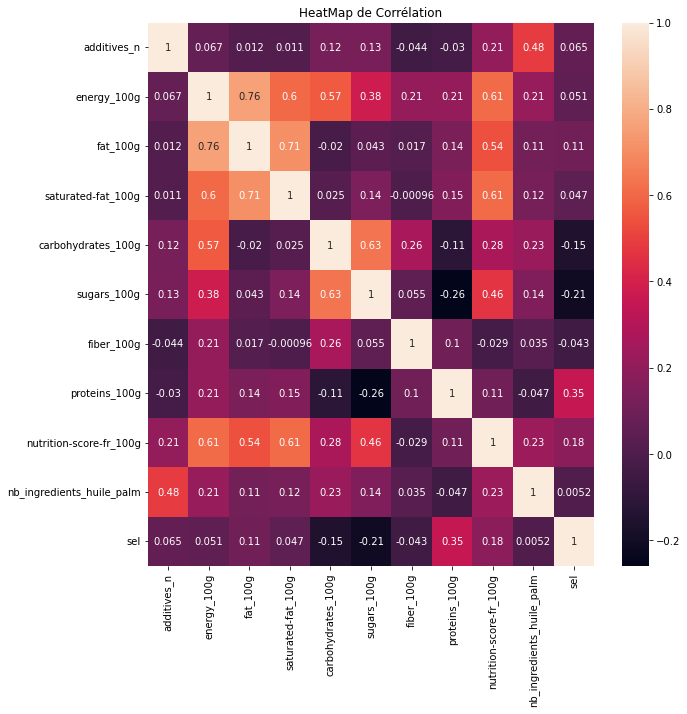

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(df_appli_clean.corr(), annot=True)
plt.title('HeatMap de Corrélation')

Globalement, les données ne sont pas trop corrélées entre elles.
- Cependant, 'energy_100g' et 'fat_100g' sont très corrélés avec un taux de 76%.
- 'fat_100g' est naturellement assez corrélé avec 'saturated-fat_100g' avec un taux de près de 71%.
- Pour les mêmes raisons, 'sugars_100g' est corrélé à près de 63% avec 'carbohydrates_100g'.



## Analyses univariées

### Variables Qualitatives 

In [11]:
#  Une fonction qui affiche les 'noms' les plus fréquents (wordcloud) et le tableau de fréquence (10 1ères lignes)

def wordcloud_tabfreq(
        dataframe,
        variable,
        nom,
        affword=True,
        affgraph=True,
        afftabfreq=True,
        nb_lignes=10):
    """
   
    ----------
    @param IN : dataframe : DataFrame
                variable : variable dont on veut voir la fréquence obligatoire
                nom : text affiché dans le tableau de fréquence obligatoire
                nb_lignes : nombre de lignes affichées dans le tab des fréquences facultatives
                affword : booléen : affiche le wordcloud ?
                affgraph : booléen : affiche le graphique de répartition en pourcentage ?
                afftabfreq : booléen : affiche le tableau des fréquences ?
    @param OUT : None
    """
    # Préparation des variables de travail
    dico = dataframe.groupby(variable)[variable].count(
    ).sort_values(ascending=False).to_dict()
    col1 = 'Nom_' + nom
    col2 = 'Nbr_' + nom
    col3 = 'Fréquence (%)'
    df_gpe = pd.DataFrame(dico.items(), columns=[col1, col2])
    df_gpe[col3] = (df_gpe[col2] * 100) / len(dataframe)
    df_gp_red = df_gpe.head(nb_lignes)

    if affword:
        # affiche le wordcloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white",
            max_words=100).generate_from_frequencies(dico)
        plt.figure(figsize=(12, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

    if affgraph:
        # Barplot de répartition
        sns.set_style("whitegrid")
        plt.figure(figsize=(8, 4))
        sns.barplot(
            y=df_gp_red[col1],
            x=df_gp_red[col3],
            data=df_gp_red,
            color='SteelBlue')
        plt.title('Répartition du nombre de ' + nom)
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    if afftabfreq:
        # affiche le tableau des fréquences
        display(df_gp_red.style.hide_index())


- **Variable 'pnns_groups_1'**

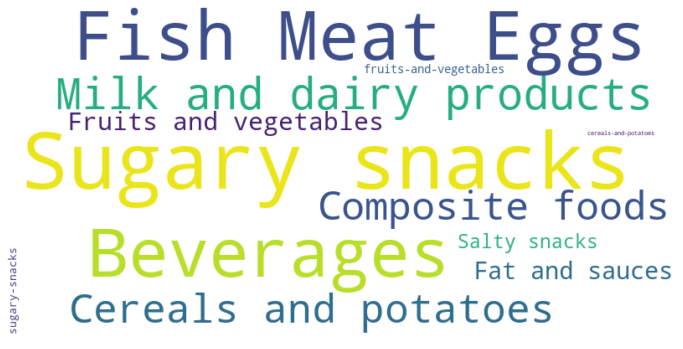

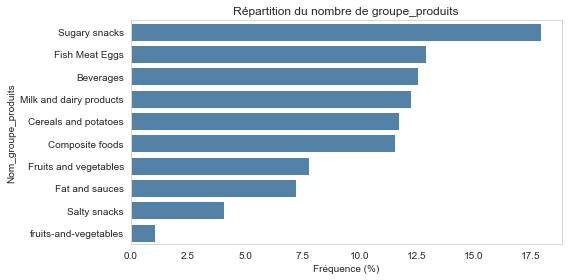

Nom_groupe_produits,Nbr_groupe_produits,Fréquence (%)
Sugary snacks,9336,17.935221
Fish Meat Eggs,6721,12.911592
Beverages,6541,12.565797
Milk and dairy products,6381,12.258424
Cereals and potatoes,6101,11.720521
Composite foods,6019,11.562992
Fruits and vegetables,4059,7.797672
Fat and sauces,3763,7.229031
Salty snacks,2114,4.061167
fruits-and-vegetables,546,1.048911


In [12]:
# Variable 'pnns_groups_1'

wordcloud_tabfreq(df_appli_clean, 'pnns_groups_1', 'groupe_produits')

- **Variable 'pnns_groups_2'**

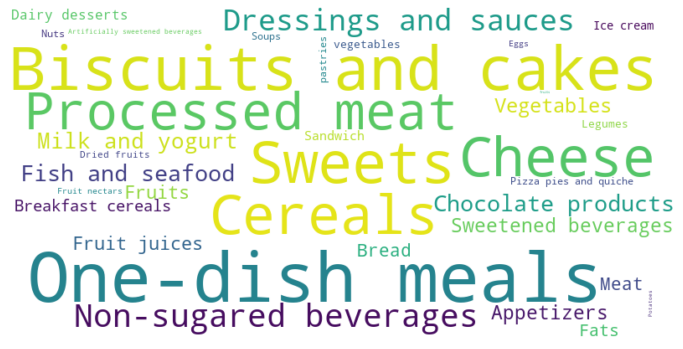

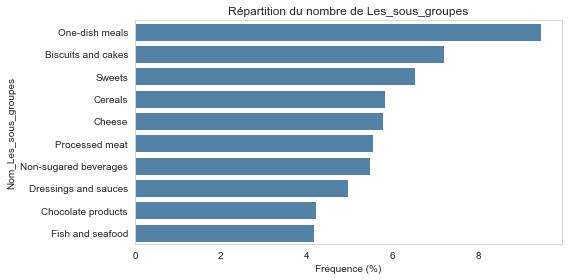

Nom_Les_sous_groupes,Nbr_Les_sous_groupes,Fréquence (%)
One-dish meals,4929,9.469013
Biscuits and cakes,3745,7.194452
Sweets,3396,6.523994
Cereals,3029,5.818957
Cheese,3005,5.772851
Processed meat,2889,5.550006
Non-sugared beverages,2850,5.475084
Dressings and sauces,2587,4.969839
Chocolate products,2195,4.216775
Fish and seafood,2169,4.166827


In [13]:
# Variable 'pnns_groups_2'

wordcloud_tabfreq(df_appli_clean, 'pnns_groups_2', 'Les_sous_groupes')

- **Variable 'product_name'**

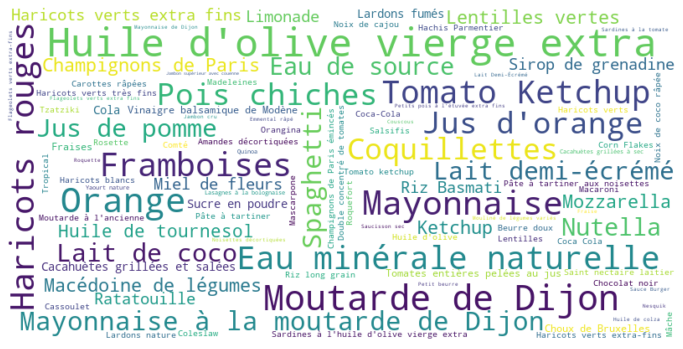

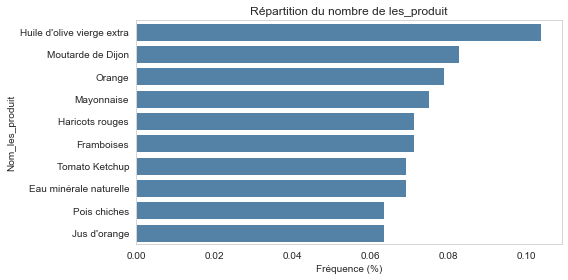

Nom_les_produit,Nbr_les_produit,Fréquence (%)
Huile d'olive vierge extra,54,0.103738
Moutarde de Dijon,43,0.082607
Orange,41,0.078764
Mayonnaise,39,0.074922
Haricots rouges,37,0.071080
Framboises,37,0.071080
Tomato Ketchup,36,0.069159
Eau minérale naturelle,36,0.069159
Pois chiches,33,0.063396
Jus d'orange,33,0.063396


In [14]:
# Variable 'product_name'

wordcloud_tabfreq(df_appli_clean, 'product_name', 'les_produit')

- **Variable 'brands'**

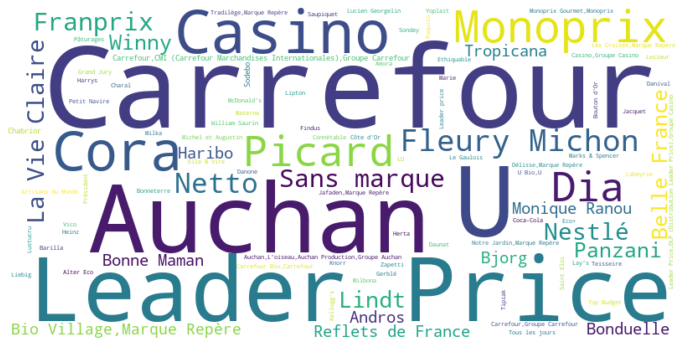

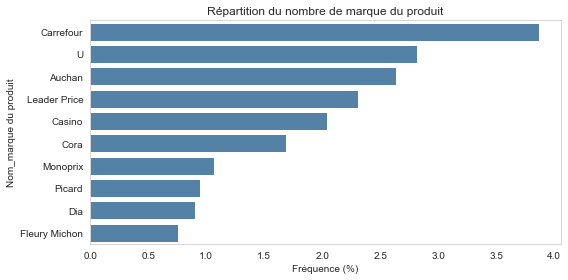

Nom_marque du produit,Nbr_marque du produit,Fréquence (%)
Carrefour,2012,3.865217
U,1465,2.814385
Auchan,1374,2.639567
Leader Price,1200,2.305298
Casino,1063,2.042110
Cora,878,1.686710
Monoprix,554,1.064279
Picard,494,0.949014
Dia,470,0.902909
Fleury Michon,396,0.760748


In [15]:
# Variable 'brands'

wordcloud_tabfreq(df_appli_clean, 'brands', 'marque du produit')

**Bilan**
___________________________________________________________________________________________________________________
- La majorité des produits du haut de la liste devraient avoir un nutri-score supérieur à 2 (d'après la répartition du nutri-score) 
- On note également que les produits de bonne qualité nutritionnelle tels que les fruits, légumes et céréales sont peu représentés dans notre jeu de données.
- La majorité des marques des produits sont des marques de grandes enseignes commerciales. Les produits recommandés pourront être trouvés facilement par nos utilisateurs.

**Nutri-score grade**

- Nutri-score avec des notes de **'A'** à **'E'**

In [16]:
# count each category within the feature
count = df_appli_clean.groupby('nutrition_grade_fr')['nutrition_grade_fr'].count()
# convert it into a dataframe
df_count = pd.DataFrame(columns=(["counts"]))
df_count.counts = count

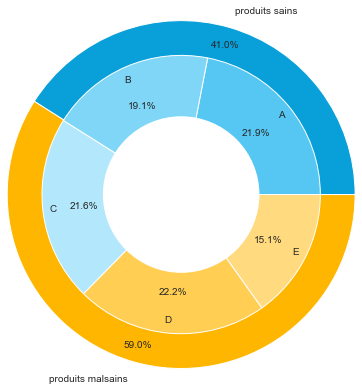

In [17]:
# les anneaux externes 
labels = ["produits sains", "produits malsains"]
sizes = [0.41, 0.59]
colors = ["#09A0DA", "#FFB600"]

# couleur des anneaux internes
colors_grade = [
    "#56C7F2",
    "#7FD6F7",
    "#B3E7FB",
    "#FFCE53",
    "#FFDA7E",
    "#FFE9B2",
    "#30B7EA",
]

#Pie plot les anneaux 
bigger = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%.1f%%",
    radius=2,
    pctdistance=0.9,
)

smaller = plt.pie(
    df_count.counts,
    labels=df_count.index,
    colors=colors_grade,
    autopct="%.1f%%",
    radius=1.6,
    pctdistance=0.7,
    labeldistance=0.90,
)
# masker le cercle en blanc 
centre_circle = plt.Circle((0, 0), 0.9, color="white", linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

**Bilan**
___________________________________________________________________________________________________________________
- La majorité des produits ont un nutri-score faible (59%) 
- Les produits les plus vendus devraient être des produits mal notés du point de vue nutri-score.


### Variables Quantitatives
- **Nutriments**

In [18]:
def histplot_boxplot(
        dataframe,
        variable,
        titre,
        xlabel,
        kde=True,
        mean_median_mode=True):
    """
    Histplot pour les variables quantitatives général +boxplot
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les histplot
                titre : titre du graphique (str)
                xlabel:légende des abscisses
                kde : boolean pour tracer la distribution normale
                mean_median_mode : boolean pour tracer la moyenne, médiane et mode
    @param OUT :None
    """
    #histplot
    fig = plt.figure(figsize=(15, 6))

    data = dataframe[variable]
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data, kde=kde, color='SteelBlue')
    if mean_median_mode:
        ax1.vlines(data.mean(), *ax1.get_ylim(), color='red', ls='-', lw=1.5)
        ax1.vlines(
            data.median(),
            *ax1.get_ylim(),
            color='green',
            ls='-.',
            lw=1.5)
        ax1.vlines(
            data.mode()[0],
            *ax1.get_ylim(),
            color='goldenrod',
            ls='--',
            lw=1.5)
    ax1.legend([ 'mode','mean', 'median'])
    ax1.set_xlabel(xlabel, fontsize=12)
    ax1.set_ylabel('Nombre', fontsize=12)
    ax1.set_title(titre, fontsize=14)
    plt.grid(False)
    
     #boxplot
        
    ax2 = fig.add_subplot(1, 2, 2)
    box = sns.boxplot(dataframe[variable], color='SteelBlue', ax=ax2)
    



C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


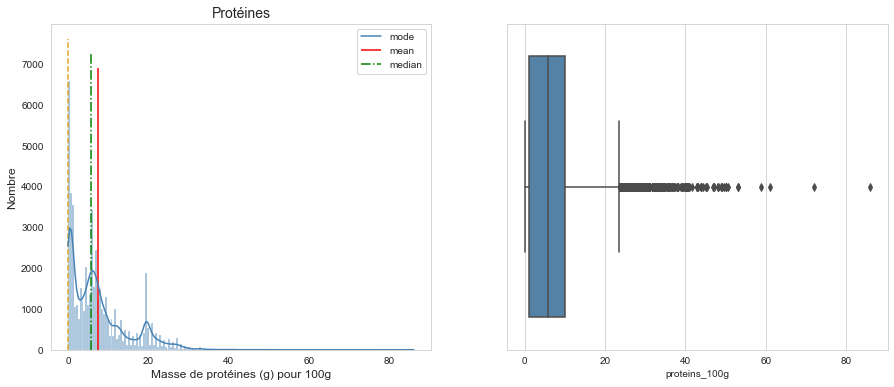

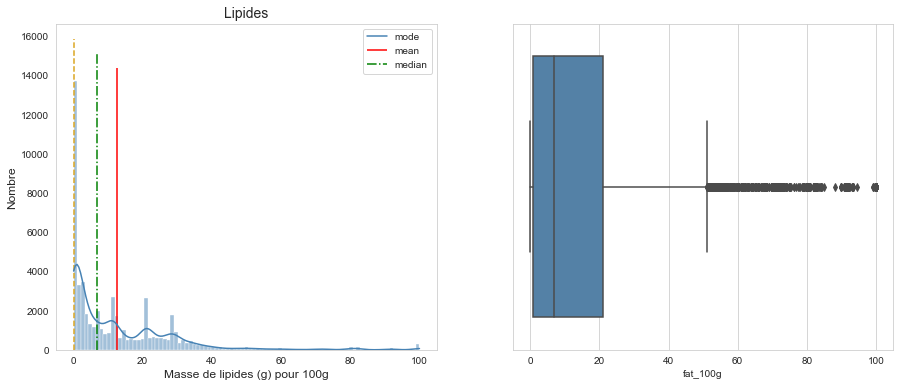

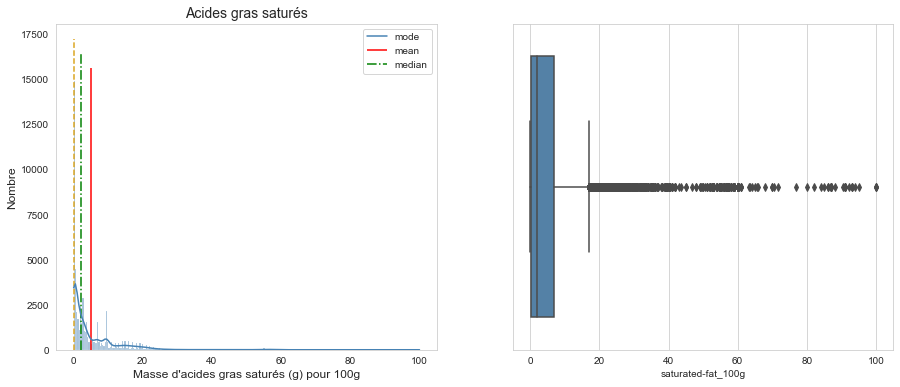

In [19]:
# Protéines
histplot_boxplot(df_appli_clean ,'proteins_100g', 'Protéines',
                                    'Masse de protéines (g) pour 100g')
                                  
# Lipides
histplot_boxplot(df_appli_clean, 'fat_100g', 'Lipides',
                                    'Masse de lipides (g) pour 100g')
                

# Acides gras saturés
histplot_boxplot(df_appli_clean, 'saturated-fat_100g', 'Acides gras saturés',
                                    'Masse d\'acides gras saturés (g) pour 100g')
                                 



C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


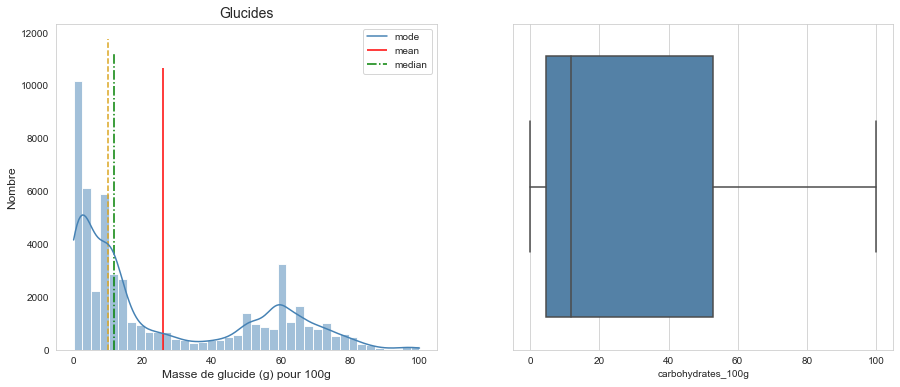

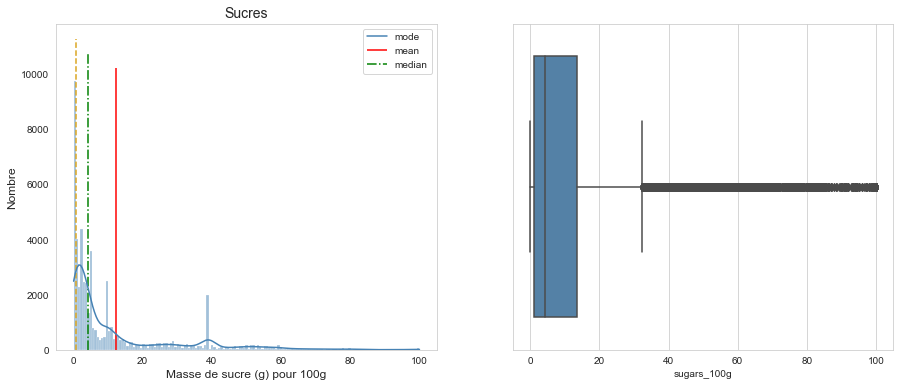

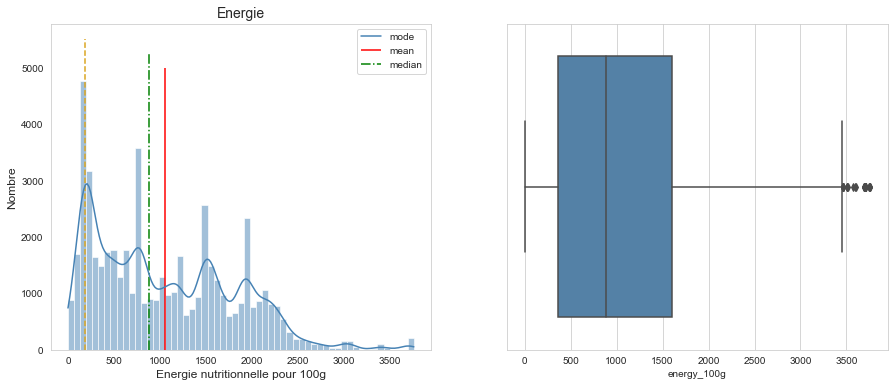

In [20]:

# Glucides
histplot_boxplot(df_appli_clean, 'carbohydrates_100g', 'Glucides',
                                    'Masse de glucide (g) pour 100g')

#Sucre 
histplot_boxplot(df_appli_clean, 'sugars_100g', 'Sucres',
                                    'Masse de sucre (g) pour 100g')

# Energie nutritionnelle
histplot_boxplot(df_appli_clean, 'energy_100g', 'Energie',
                                    'Energie nutritionnelle pour 100g')

C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


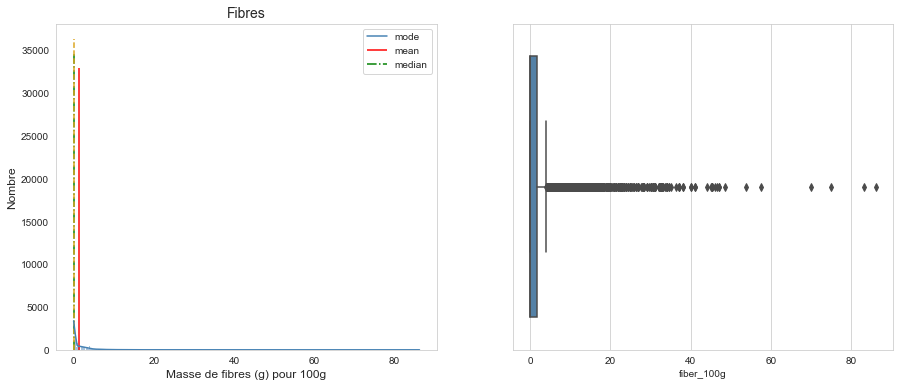

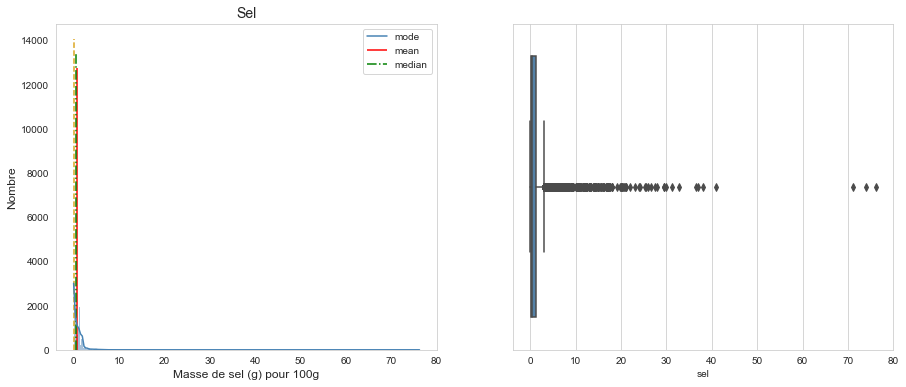

In [21]:
# Fibres
histplot_boxplot(df_appli_clean, 'fiber_100g', 'Fibres',
                                    'Masse de fibres (g) pour 100g')

# Sel
histplot_boxplot(df_appli_clean, 'sel', 'Sel',
                                    'Masse de sel (g) pour 100g')


**Description statistique des variables**

In [22]:
# fonction pour afficher le table de description statistique 

def stat_descriptives(dataframe, liste_variables):
    """
    Statistiques descriptives moyenne, mediane, variance, écart-type,
    skewness et kurtosis du dataframe transmis en paramètre
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                liste_variables : colonne dont on veut voir les stat descr
    @param OUT : dataframe des statistiques descriptives
    """
    liste_mean = ['mean']
    liste_median = ['median']
    liste_var = ['var']
    liste_std = ['std']
    liste_skew = ['skew']
    liste_kurtosis = ['kurtosis']
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['Max']
    liste_min = ['Min']

    for col in liste_variables:
        liste_mean.append(dataframe[col].mean())
        liste_median.append(dataframe[col].median())
        liste_var.append(dataframe[col].var(ddof=0))
        liste_std.append(dataframe[col].std(ddof=0))
        liste_skew.append(dataframe[col].skew())
        liste_kurtosis.append(dataframe[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(dataframe[col].mode().to_string())
        liste_min.append(dataframe[col].min())
        liste_max.append(dataframe[col].max())

    data_stats = [liste_mean, liste_median, liste_var, liste_std, liste_skew,
                  liste_kurtosis, liste_mode, liste_min, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)

    return df_stat.style.hide_index()


In [24]:
columns_ = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g','proteins_100g','sel']
stat_descriptives(df_appli_clean, columns_)

Desc,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sel
mean,1051.287714,12.680111,4.902931,25.891689,12.165605,7.436662,0.821558
median,885.000000,6.900000,2.000000,11.800000,4.300000,5.800000,0.430000
var,573359.190529,253.621540,57.144687,714.327075,305.768127,52.367700,1.935080
std,757.204854,15.925500,7.559410,26.726898,17.486227,7.236553,1.391071
skew,0.612814,2.319976,3.589049,0.782891,2.020371,1.302318,14.793307
kurtosis,-0.288412,7.643637,21.918410,-0.892303,3.956578,1.782721,541.969359
mode,0 184.0,0 0.0,0 0.0,0 10.0,0 0.6,0 0.0,0 0.0
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3760.000000,100.000000,100.000000,100.000000,100.000000,86.000000,76.200000


**Bilan**
______________________________________________________________________________________________________________________

- Toutes les courbes sont asymétriques, avec un skewness positif, indiquant une distribution étalée à droite.
- Les courbes sont moins aplaties que la distribution normale donc les observations sont plus concentrées d'après les kurtosis empiriques positifs. Exception pour la courbe des glucides et energy, avec un kurtosos empirique négatif donc une distribution plus aplatie que la distribution normale.
- Un pic autour de 0 pour toutes les variables quantitatives ne peuvent pas être imputées à des valeurs erronées, puisque certains produits ne contiennent ni lipides, ni glucides, ni protéines, ni sel...

**Additifs**

In [25]:
df_appli_clean.columns

Index(['code', 'image_url', 'product_name', 'pnns_groups_1', 'pnns_groups_2',
       'main_category_fr', 'brands', 'additives_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g',
       'nb_ingredients_huile_palm', 'sel'],
      dtype='object')

C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


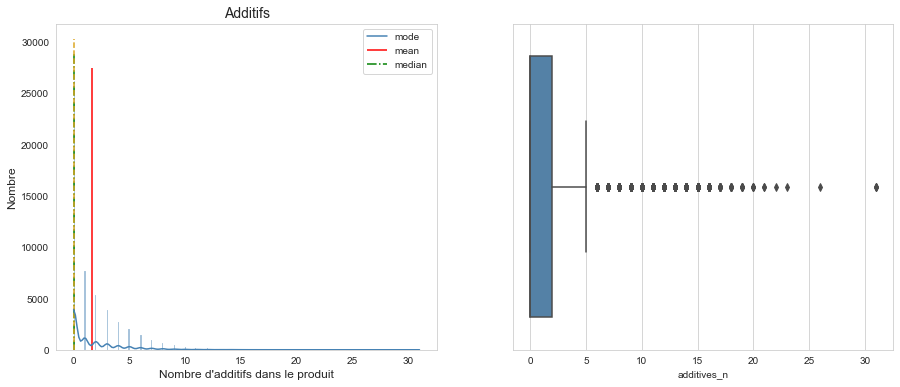

In [26]:
histplot_boxplot(df_appli_clean, 'additives_n','Additifs','Nombre d\'additifs dans le produit')


C:\Users\karim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


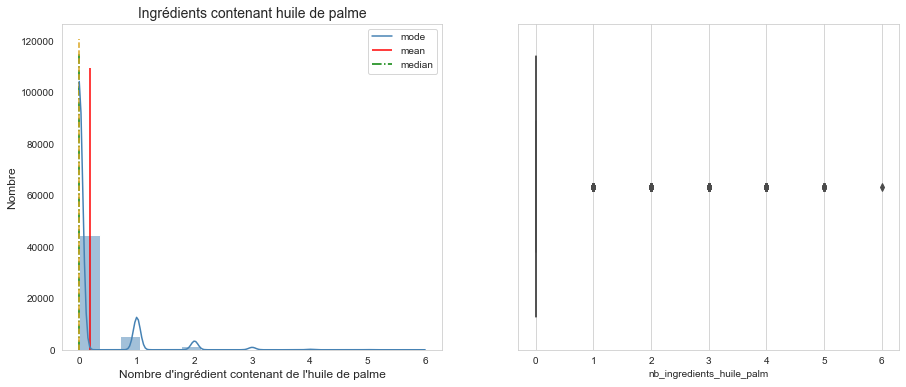

In [27]:
histplot_boxplot(df_appli_clean, 'nb_ingredients_huile_palm','Ingrédients contenant huile de palme',
                                    'Nombre d\'ingrédient contenant de l\'huile de palme')


**Bilan**
_______________________________________________________________________________________________________________________
- La majorité des produits saisis dans Open Food Facts ne contiennent pas d'huile de palme ou d'ingrédients pouvant contenir de l'huile de palme.
- L'amplitude des ingrédients contenant de l'huile de palme est compris entre 0 et 5.

## Analyses bivariées

### Nutri-grade/Variables quantitatives

**Nutri-score**

- Le nutri-score est attribué sur la base d’un score prenant en compte pour 100 g ou 100 ml de produit, la teneur :
  -   nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
  -   nutriments à limiter (énergie, acides gras saturés, sucres, sel).

Source : Santé Publique France

- La fonction **PairPlot** créé une grille d'axes de telle sorte que chaque variable numérique des données sera partagée sur l'axe des y sur une seule ligne et sur l'axe des x sur une seule colonne.
Les Axes diagonaux sont traités différemment, en traçant un graphique pour montrer la distribution univariée des données pour la variable dans cette colonne.

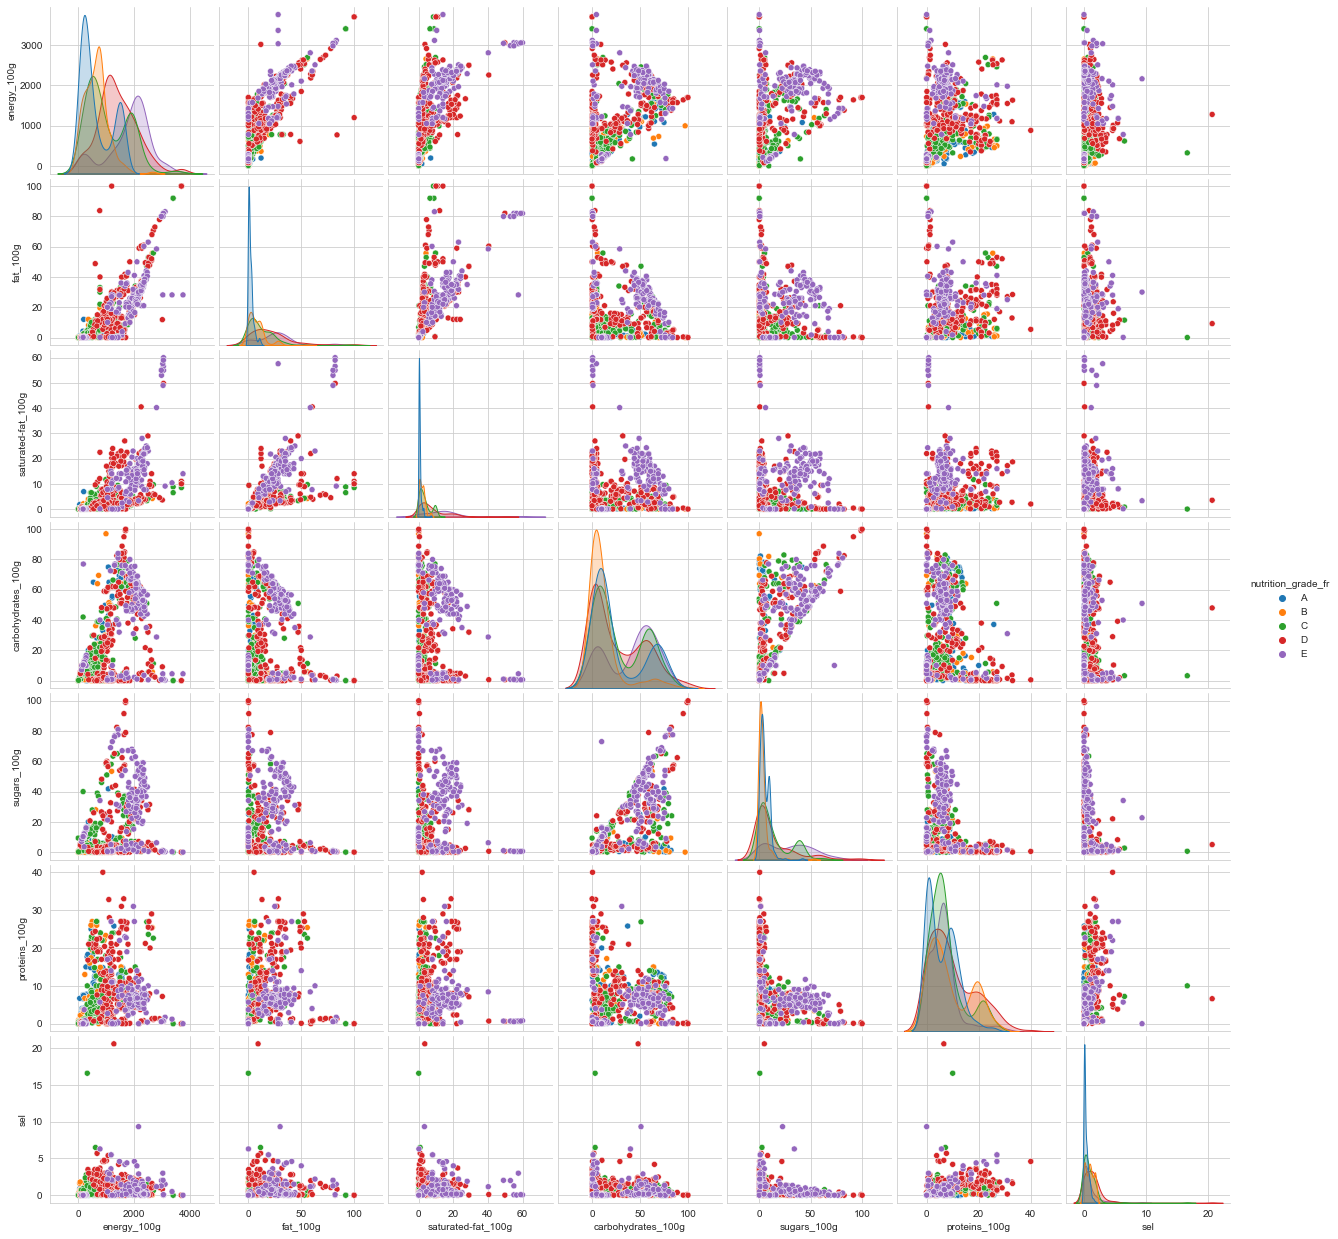

In [28]:
col=['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sel','nutrition_grade_fr']

sns.pairplot(df_appli_clean[col].sample(1000,random_state=0).sort_values(by='nutrition_grade_fr'), hue='nutrition_grade_fr')
plt.show()

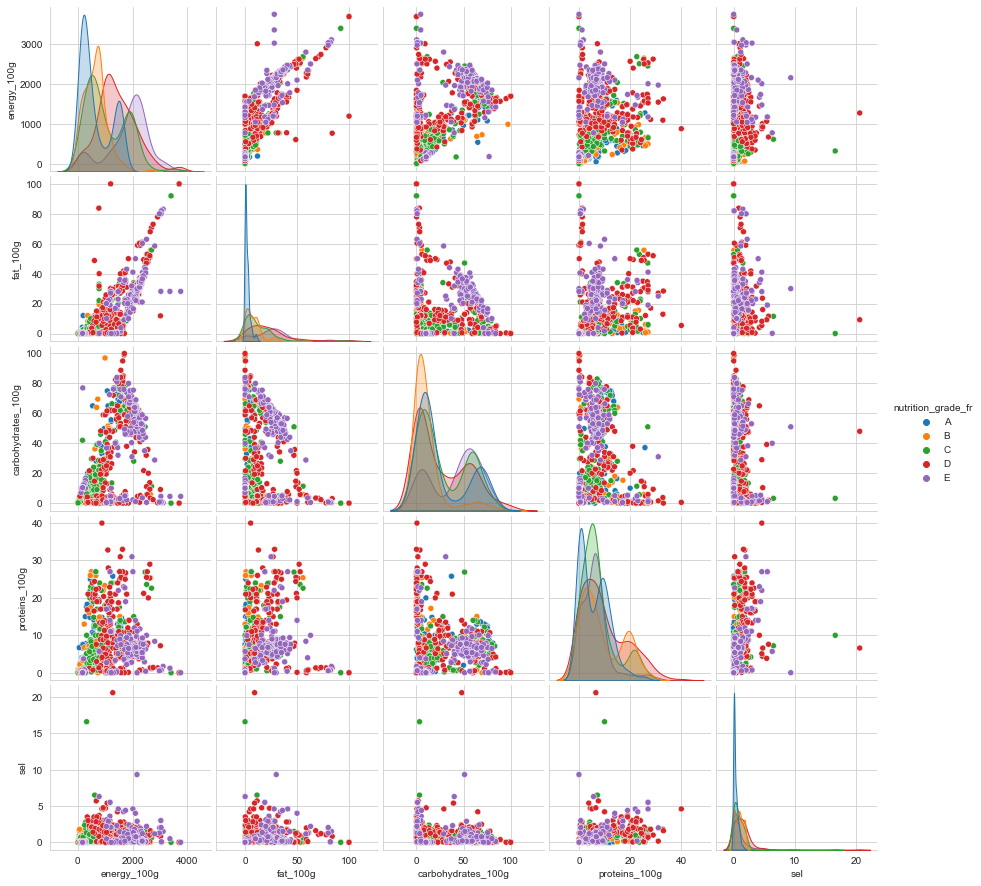

In [29]:
col=['energy_100g','fat_100g','carbohydrates_100g','proteins_100g','sel','nutrition_grade_fr']

sns.pairplot(df_appli_clean[col].sample(1000,random_state=0).sort_values(by='nutrition_grade_fr'), hue='nutrition_grade_fr')
plt.show()

On remarque :

- Une corrélation entre les principaux carburants et leurs déclinaisons (fat avec saturated_fat, et carbohydrates avec sugars)
- L'énergie est le plus corrélé avec le gras, puis ensuite avec les glucides.
- Le nutri_score est impacté par l'énergie (et donc le gras car ils sont corrélés)

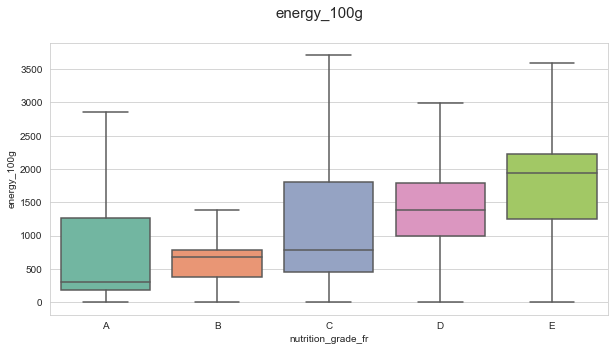

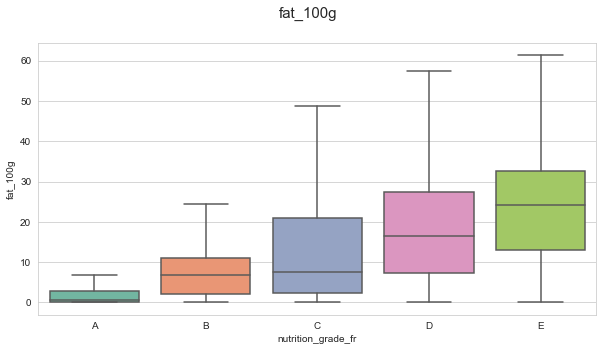

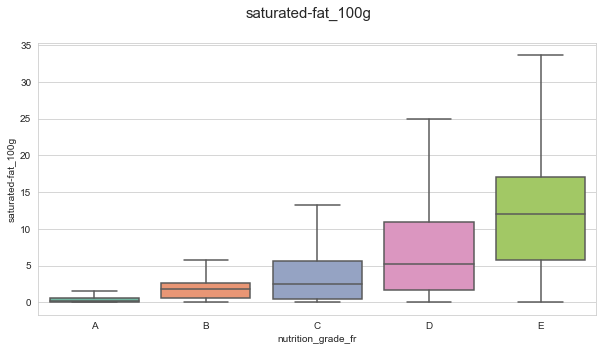

In [30]:
# tracer les boxplot pour les varible en fonction de nutri score 

for nutriment in ['energy_100g','fat_100g', 'saturated-fat_100g']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)

  chart = sns.boxplot(
      data=df_appli_clean,
      x='nutrition_grade_fr',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_appli_clean.nutrition_grade_fr.sort_values().unique()
  )


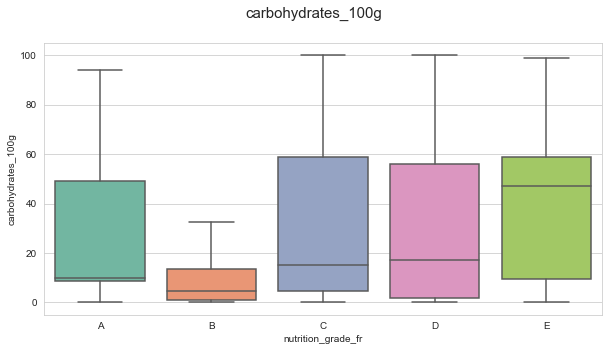

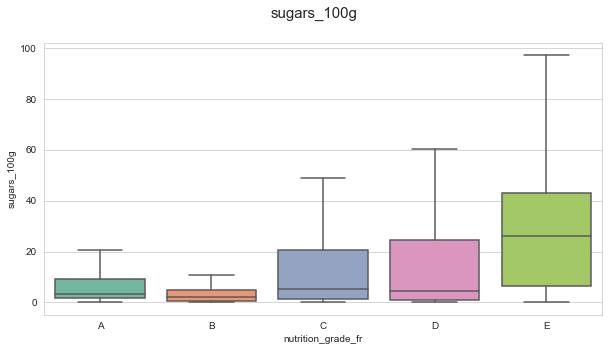

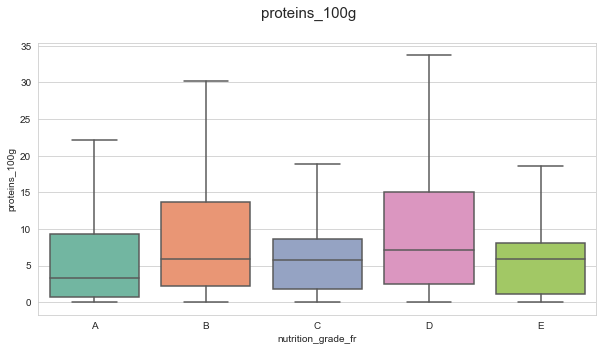

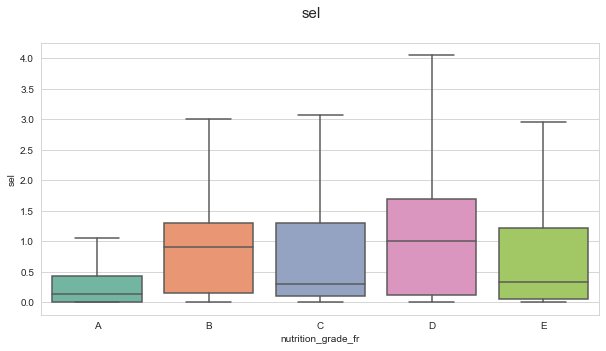

In [31]:
for nutriment in ['carbohydrates_100g','sugars_100g','proteins_100g','sel']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)

  chart = sns.boxplot(
      data=df_appli_clean,
      x='nutrition_grade_fr',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_appli_clean.nutrition_grade_fr.sort_values().unique()
  )


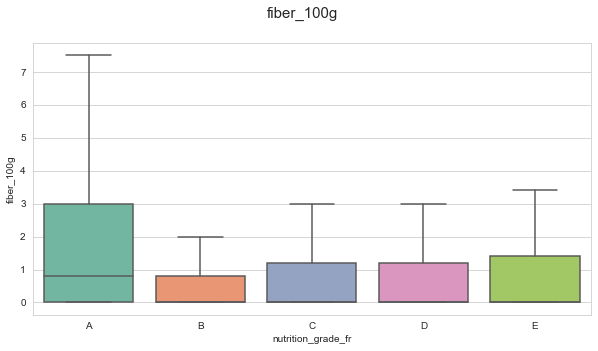

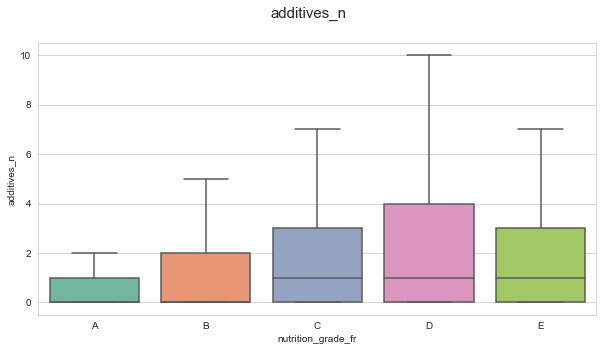

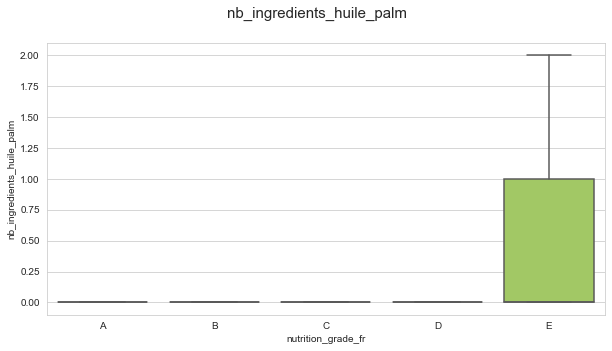

In [32]:
for nutriment in ['fiber_100g','additives_n','nb_ingredients_huile_palm']:
  fig = plt.figure(figsize=(10,5))
  fig.suptitle(nutriment, fontsize=15)

  chart = sns.boxplot(
      data=df_appli_clean,
      x='nutrition_grade_fr',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=df_appli_clean.nutrition_grade_fr.sort_values().unique()
  )


**Bilan**
_______________________________________________________________________________________________________________________
- **Energie** : plus le produit est mal noté, plus le produit est calorique
- **Lipides/ acides gras saturés** : plus le produit contient des lipides ou des acides gras saturés, plus le produit à un nutri-score élevé et est donc mal noté.
- **Glucides/Sucres** : plus le produit contient du sucre, plus le produit à un nutri-score élevé et est donc mal noté.
- **proteins**: Il ne semble pas exister de corrélation entre la valeur de 'proteins_100g' et la valeur du 'nutrigrade'.
- **Sel** : plus le produit contient du sel, plus il est mal noté.
- **Fibres** : les produits contenant des fibres sont les mieux notés.
- **Additifs** : plus le produit contient des additifs, plus il est mal noté.
- **Huile de palme** : plus le produit contient de l'huile de palme, plus il est mal noté 

### protéines 



####  protéines / Groupes des produits 



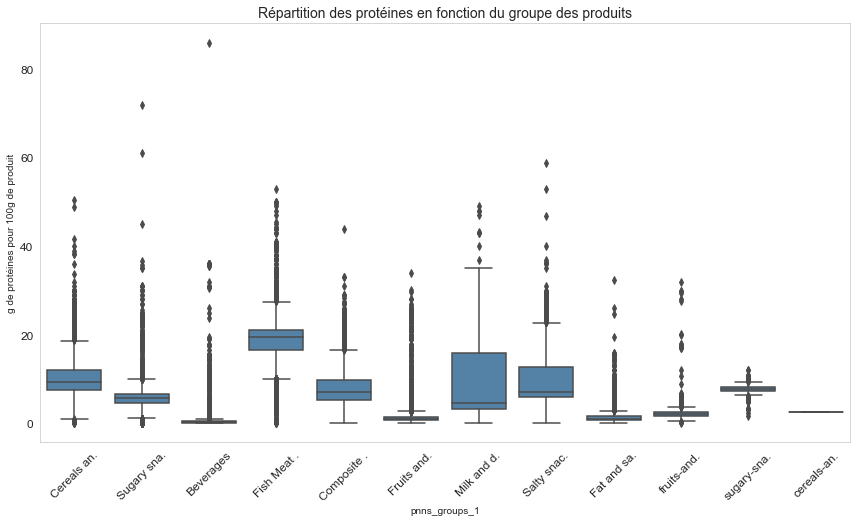

In [33]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1, 1, 1)
sns.boxplot(data=df_appli_clean, x='pnns_groups_1',
            y='proteins_100g', color='SteelBlue', ax=ax)
plt.grid(False)
labels = [item.get_text() for item in ax.get_xticklabels()]
short_labels = [s[0:10]+'.' if len(s) > 10 else s for s in labels]
ax.set_xticklabels(short_labels)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('g de protéines pour 100g de produit')
plt.title(
    'Répartition des protéines en fonction du groupe des produits', fontsize=14,)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Bilan**
_______________________________________________________________________________________________________________________
- Les protéines sont représentées dans tous les groupes de produits.
- Une forte proportion de protéines pour les viandes, poissons, oeufs et les produits laitiers

####  protéines / les additifs/ nutri-score



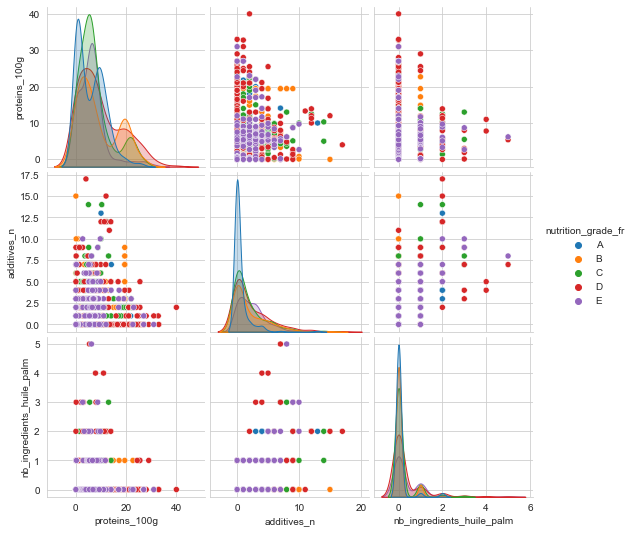

In [34]:
cols_additifs = ['proteins_100g', 'additives_n', 'nb_ingredients_huile_palm', 'nutrition_grade_fr']
sns.pairplot(df_appli_clean[cols_additifs].sample(1000,random_state=0).sort_values(by='nutrition_grade_fr'), hue='nutrition_grade_fr')
plt.show()

- Les additifs sont très présents dans les produits avec un nutri_score plus elever et une tenueur en protine elever .

####  protéines / nutrition_grade

- Hypothèse à vérifier : d'après la définition du nutri-score, on s'attend à ce que les produits les plus protéinés ont les scores les plus bas donc un nutri-grade A ou B?

In [35]:
# Préparation des variables de travail pour les graphiques et les tests

gb = df_appli_clean.groupby('nutrition_grade_fr')['proteins_100g']
nutrigr_df = pd.DataFrame([gb.get_group(n).values for n in list('ABCDE')],
                          index=list('abcde')).T

nutrigr_df_sans_nan = nutrigr_df.dropna()
nutrigr_df_a = nutrigr_df_sans_nan['a']
nutrigr_df_b = nutrigr_df_sans_nan['b']
nutrigr_df_c = nutrigr_df_sans_nan['c']
nutrigr_df_d = nutrigr_df_sans_nan['d']
nutrigr_df_e = nutrigr_df_sans_nan['e']

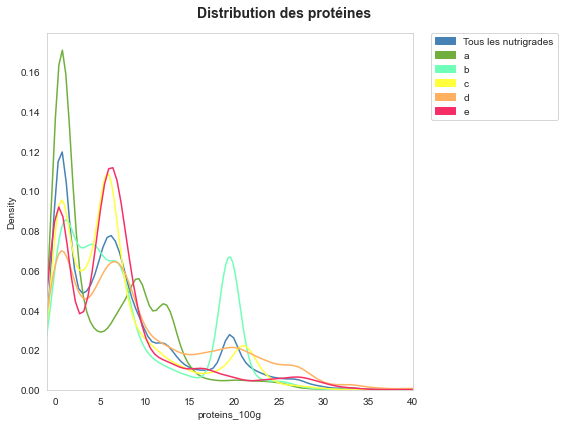

In [36]:
colors= [  # definir les couleurs 
    "#70af3d",
    "#70ffb7",
    "#ffff3b",
    "#ffb161",
    "#f62e66",
]

nutrigr_df_a  # Distribution des protéines par nutri-score
fig = plt.figure(figsize=(8, 6))
label_patches = []

sns.kdeplot(df_appli_clean['proteins_100g'], color='SteelBlue')
label_patch = mpatches.Patch(
    color='SteelBlue',
    label='Tous les nutrigrades')
label_patches.append(label_patch)
plt.grid(False)
plt.xlim([0, 60])

i = 1
for n, c in zip(list('abcde'), colors):
    i += 1
    sns.kdeplot(nutrigr_df[n], color=c)
    label_patch = mpatches.Patch(
        color=c,
        label=n)
    label_patches.append(label_patch)
    plt.grid(False)
    plt.xlim([-1, 40])

fig.suptitle('Distribution des protéines',
             fontweight='bold', fontsize=14)
plt.legend(
    handles=label_patches,
    bbox_to_anchor=(
        1.05,
        1),
    loc=2,
    borderaxespad=0.,
    facecolor='white')

plt.tight_layout()
plt.grid(False)
plt.show()

C:\Users\karim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

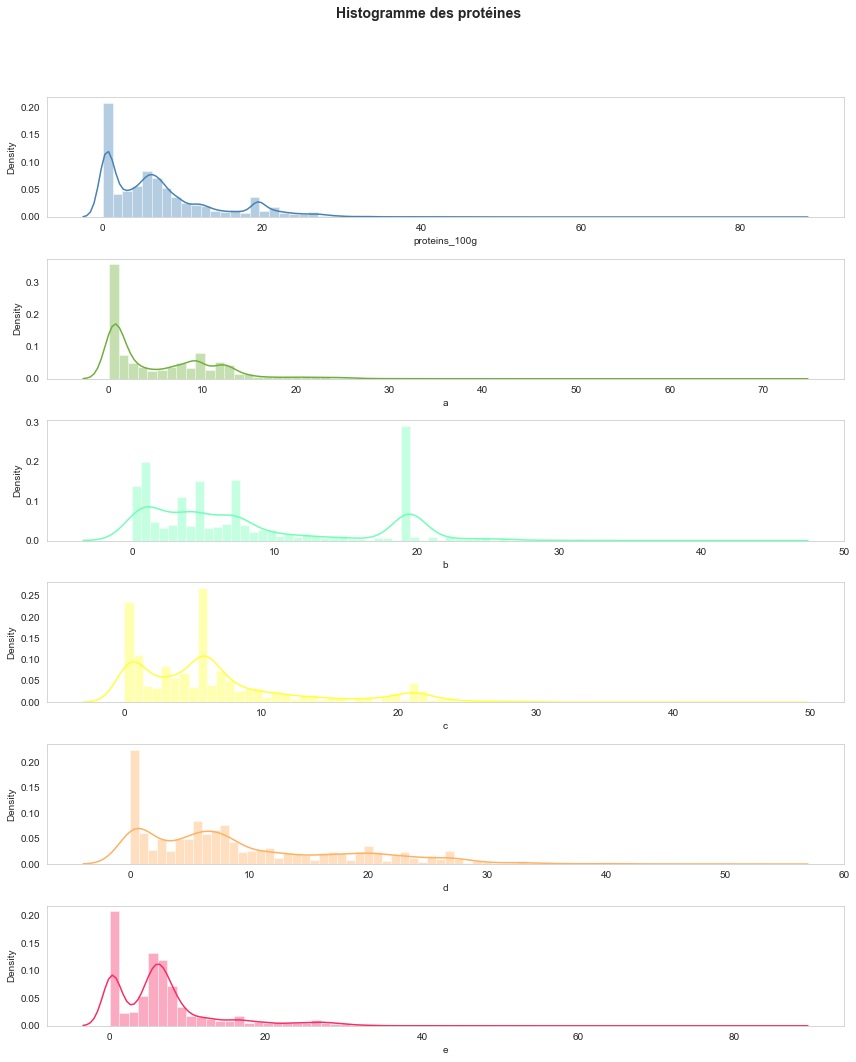

In [37]:
# Histogramme des protéines, général et par nutri-score
fig = plt.figure(figsize=(12, 15))

fig.add_subplot(6, 1, 1)
sns.distplot(df_appli_clean['proteins_100g'], bins=70, color='SteelBlue')
plt.grid(False)

i = 1
for n, c in zip(list('abcde'), colors):
    i += 1
    ax = fig.add_subplot(6, 1, i)
    sns.distplot(nutrigr_df[n], color=c, bins=70)
    plt.grid(False)
fig.suptitle('Histogramme des protéines',
             fontweight='bold', fontsize=14)

plt.tight_layout(rect=[0, 0.0, 1, 0.93])
plt.grid(False)
plt.show()

In [38]:
stat_descriptives(df_appli_clean, ['proteins_100g'])

Desc,proteins_100g
mean,7.436662
median,5.800000
var,52.367700
std,7.236553
skew,1.302318
kurtosis,1.782721
mode,0 0.0
Min,0.000000
Max,86.000000


**Bilan**
_______________________________________________________________________________________________________________________
- La courbe de distribution est étalée à droite (skewness positif) et moins applatie que la distribution normale, avec des observations plus concentrées (kurtosis empirique positif).
- Les différentes courbes de répartition des protéines par nutri-score ne permettent pas de conclure sur les produits bien notés selon leur nombre de grammes de protéines. La variable protéine semble peu corrélée avec le nutri-score.

## ANOVA
Étudions maintenant l'analyse de la variance entre chaque variable quantitative et le nutrition_grade


- Pour réaliser l'analyse de la variance nous devons calculer le rapport de corrélation, compris entre 0 et 1 et définit par : **η2 = SCE / SCT**

  - SCT est ici appelé variation totale (ou Total Sum of Squares).
  - SCE est ici appelé variation interclasse (ou Sum of Squares of the Model).
  
  Dans notre cas, les classes sont les modalités de 'nutrigrade'.

- Si η2 = 0, cela signifie que les moyennes par classes sont toutes égales.
Il n’y a donc pas a priori de relation entre la valeur nutritionnelle étudié et le 'nutrigrade'.
- Si η2=1 , cela signifie que les moyennes par classes sont très différentes.
Il existe donc a priori une relation entre la valeur nutritionnelle étudié et le 'nutrigrade'.



In [39]:
# ANOVA entre chaque variable quantitative et la variable nutrition_grade
def anova_analysis(data,qualitative_col,quantitative_col,
                   figsize=(20,40)):

    modalites = [m for m in data[qualitative_col].unique() if str(m)!="nan"]
    modalites.sort()

    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}

    nbr_rows = int(len(quantitative_col)/2) + 1
    index = 1

    plt.figure(figsize=figsize)

    print("ANOVA entre chaque variable quantitative et la variable nutrition_grade")

    for column in quantitative_col:
        groupes = []
        for m in modalites:
            groupes.append(data[data[qualitative_col]==m][column])
        plt.subplot(nbr_rows, 2, index)
        plt.boxplot(groupes, labels=modalites,showfliers=False, medianprops=medianprops,
                    vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

        moyenne_y = data[column].mean()
        nutri_grades = []
        for modalite in modalites:
            yi_modalite = data[column][data[qualitative_col]==modalite]
            nutri_grades.append({'ni': len(yi_modalite),
                                 'moyenne': yi_modalite.mean(),
                                 'yi': yi_modalite})
        SCT = sum([(yj - moyenne_y)**2 for yj in data[column]])
        SCE = sum([c['ni']*(c['moyenne'] - moyenne_y)**2 for c in nutri_grades])
        result = round(SCE/SCT, 4)

        plt.title(f'ANOVA (Rapport de corrélation eta carré = {result})')
        #plt.xlabel(qualitative_col)
        plt.ylabel(column)
        index += 1
    plt.show()

ANOVA entre chaque variable quantitative et la variable nutrition_grade


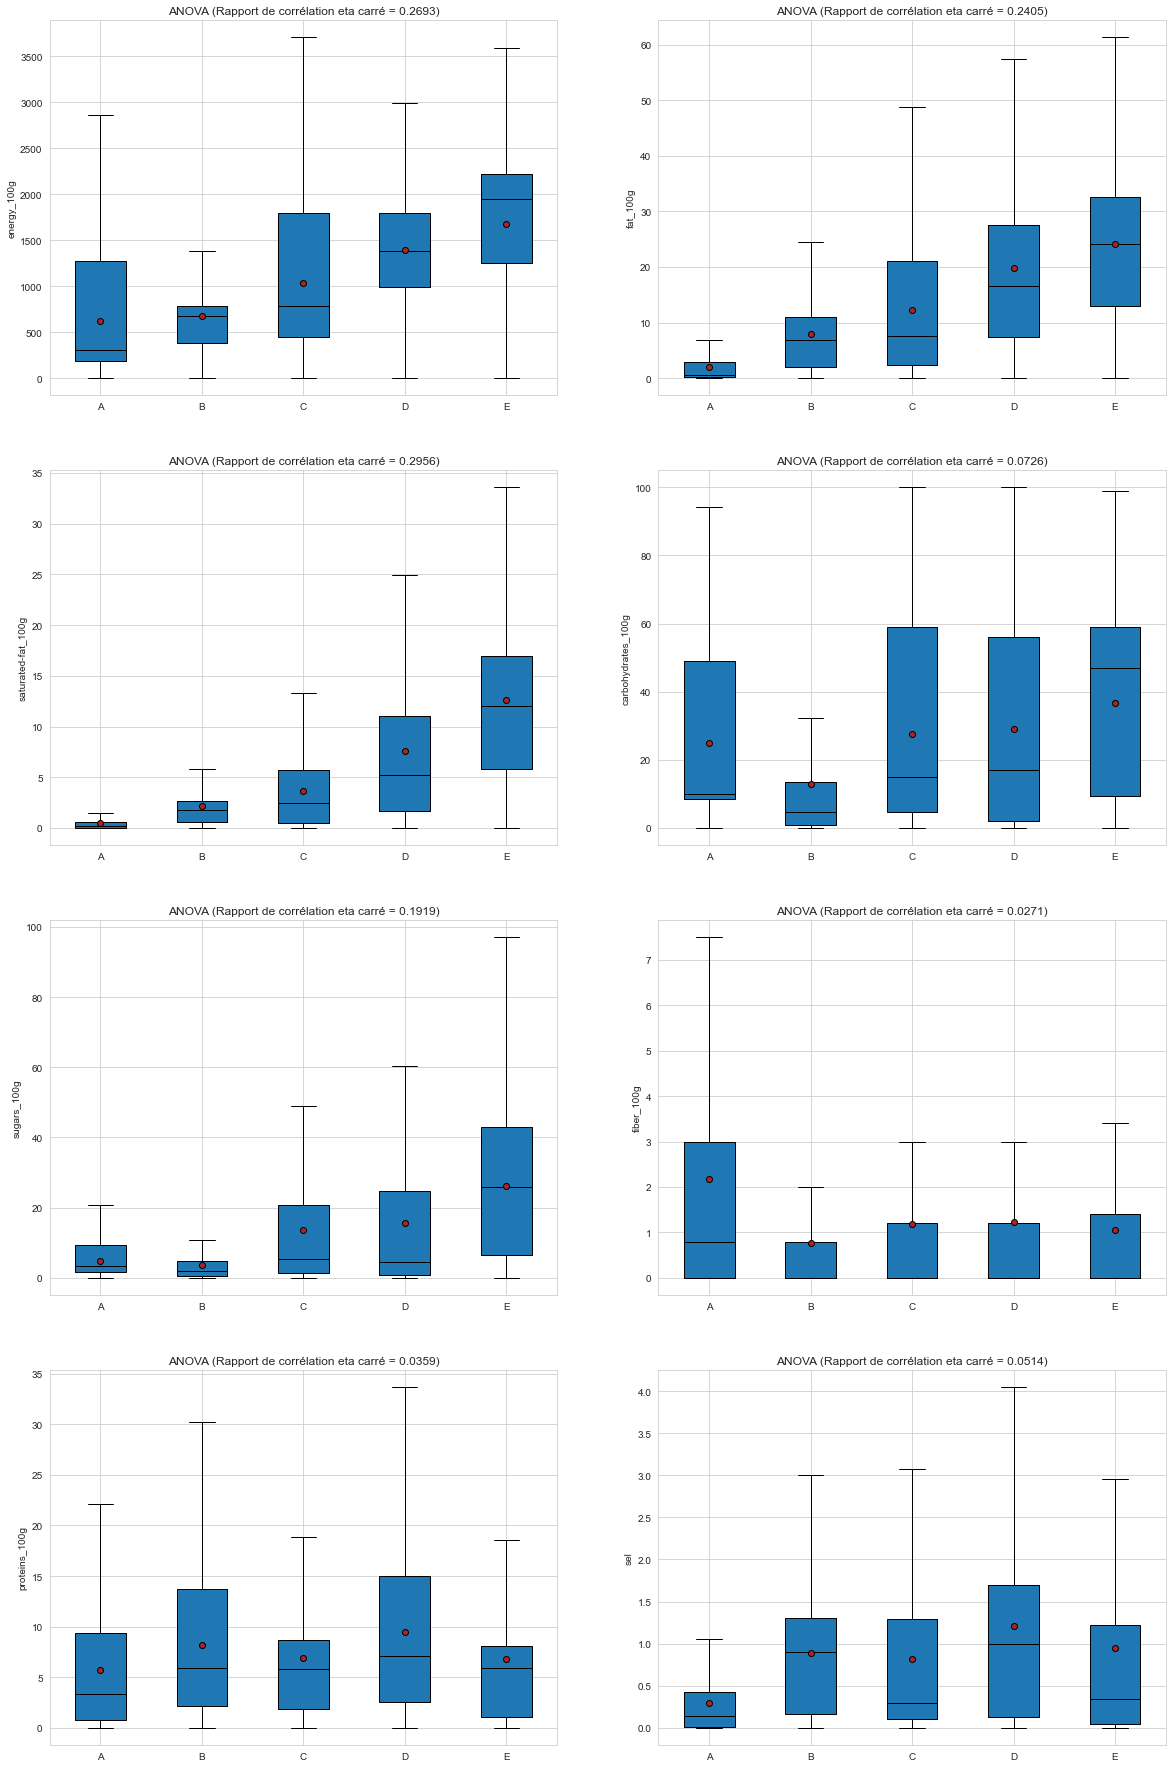

In [40]:
quanti = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sel']
anova_analysis(df_appli_clean,'nutrition_grade_fr', quanti)

Avec ces boîtes à moustaches on observe la répartition des classes du nutrition_grade (a à e), pour chaque variable quantitative. On calcule ensuite le rapport de corrélation des variables (compris entre 0 et 1), qui est le rapport entre les variances interclasses et la variance totale. Il n'y a pas corrélation si les moyennes par classes sont toutes égales ou presque. Il y a corrélation si les moyennes par classes sont très différentes.

- On observe donc ici que les variables les plus corrélées avec le nutrition_grade sont :
     - energy_100g (R = 0.4078)
     - fat_100g (R=0.58)
     - saturated_fat_100g (0.4291)
- Les glucides et le sucres le sont beaucoup moins :
     - carbohydrates_100g (R=0.2)
     - sugars_100g (R=0.198)
- Les autres nutriments ne sont pas corrélés avec le nutrition_grade le protine( 0.04)


## ACP : Analyse en Composante Principale

In [41]:
# Sélection des colonnes pour l'ACP
cols_acp = df_appli_clean.select_dtypes(include=[np.number]).columns.to_list()

# Nombre de composantes
n_comp = len(cols_acp)
# Données pour l'ACP
data_acp = df_appli_clean[cols_acp]
# Noms affichés
names =  df_appli_clean['product_name']
features = data_acp.columns
X = data_acp.values

In [42]:
# Centrage et Réduction - Mise à l'échelle
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

In [43]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=11)

In [44]:
# Valeurs propres ou variances des composantes principales
val_propres = pca.explained_variance_
val_propres

array([3.3554296 , 1.97087057, 1.4037534 , 1.21769054, 0.91788756,
       0.6165757 , 0.5316245 , 0.45732394, 0.27283569, 0.22854211,
       0.02767771])

In [45]:
# Vecteurs propres de l'ACP non réduite = combinaison linéaire permettant de
# définir les variables principales
pca.components_.T

array([[ 1.27112158e-01, -1.76214409e-01,  6.70916703e-01,
         2.14687529e-02, -1.16236493e-01, -1.64533486e-02,
        -5.00274838e-01, -4.75829996e-01,  8.87584111e-02,
         6.11992924e-02, -1.03299857e-02],
       [ 4.97477607e-01,  3.76462729e-02, -1.57633481e-01,
         1.26802195e-01, -5.28845199e-02, -1.24790230e-01,
         2.45393240e-01, -3.38600980e-01, -7.53997170e-02,
        -1.32393726e-02, -7.14894006e-01],
       [ 4.03448203e-01,  3.21157902e-01, -9.93533928e-02,
        -1.99313056e-01, -2.58131452e-01,  1.04117091e-01,
         1.45461638e-01, -3.22367937e-01, -4.18989454e-01,
         1.63174804e-01,  5.28923236e-01],
       [ 4.01181741e-01,  2.70019457e-01, -9.63577452e-02,
        -2.50666626e-01, -1.77191043e-01,  2.28292803e-02,
        -1.75523871e-01,  2.50609657e-01,  7.15094597e-01,
         2.38140862e-01,  2.05208975e-02],
       [ 2.77450259e-01, -4.63711514e-01, -1.34225110e-01,
         3.00904479e-01,  2.09381944e-01, -1.58990599e-01,
  

In [46]:
df_acp = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=cols_acp).T
df_acp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
additives_n,0.127112,-0.176214,0.670917,0.021469,-0.116236,-0.016453,-0.500275,-0.475830,0.088758,0.061199,-0.010330
energy_100g,0.497478,0.037646,-0.157633,0.126802,-0.052885,-0.124790,0.245393,-0.338601,-0.075400,-0.013239,-0.714894
fat_100g,0.403448,0.321158,-0.099353,-0.199313,-0.258131,0.104117,0.145462,-0.322368,-0.418989,0.163175,0.528923
saturated-fat_100g,0.401182,0.270019,-0.096358,-0.250667,-0.177191,0.022829,-0.175524,0.250610,0.715095,0.238141,0.020521
carbohydrates_100g,0.277450,-0.463712,-0.134225,0.300904,0.209382,-0.158991,0.283602,-0.241479,0.381779,-0.229304,0.439587
sugars_100g,0.282954,-0.456985,-0.128613,-0.077143,0.384943,0.011189,-0.221317,0.225906,-0.270531,0.605829,-0.008570
fiber_100g,0.082387,-0.110458,-0.235797,0.648706,-0.459654,0.428868,-0.288178,0.149096,-0.062052,0.006515,0.014598
proteins_100g,0.073647,0.417242,0.069185,0.495855,0.136586,-0.673054,-0.184380,0.161371,-0.103021,0.112004,0.122370
nutrition-score-fr_100g,0.449391,0.055140,0.078227,-0.133274,0.271453,0.130553,-0.298215,0.321452,-0.210375,-0.666134,0.011774
nb_ingredients_huile_palm,0.199159,-0.193188,0.563728,0.051760,-0.336532,-0.065835,0.493872,0.477863,-0.093291,0.063164,0.001544


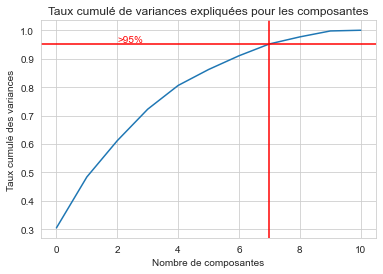

In [47]:
# quel est le pourcentage de variance préservée par chacune de
# nos composantes?
variances = pca.explained_variance_ratio_

# quelle est la somme cumulée de chacune de ces variances?
meilleur_dims = np.cumsum(variances)

#  on va trouver le moment où on attient 95% ou 99% entre réduire au maxi
# où garder au maxi
plt.plot(meilleur_dims)
# argmax pour > 95 %
best = np.argmax(meilleur_dims > 0.95)
plt.axhline(y=0.95, color='r')
plt.text(2, 0.96, '>95%', color='r', fontsize=10)
plt.axvline(x=best, color='r')
plt.title('Taux cumulé de variances expliquées pour les composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Taux cumulé des variances')
plt.show()

- A partir de la 7ième composante on explique 95% de la variance On pourrait donc réduire notre jeu de données.

In [48]:
# Affichage du graphique des éboulis des valeurs propres
def scree_plot(pca):
    taux_var_exp = pca.explained_variance_ratio_
    scree = taux_var_exp * 100
    plt.bar(np.arange(len(scree)) + 1, scree, color='SteelBlue')
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(scree)) + 1, scree.cumsum(), c='red', marker='o')
    ax2.set_ylabel('Taux cumulatif de l\'inertie')
    ax1.set_xlabel('Rang de l\'axe d\'inertie')
    ax1.set_ylabel('Pourcentage d\'inertie')
    for i, p in enumerate(ax1.patches):
        ax1.text(
            p.get_width() /
            5 +
            p.get_x(),
            p.get_height() +
            p.get_y() +
            0.3,
            '{:.0f}%'.format(
                taux_var_exp[i] *
                100),
            fontsize=8,
            color='k')
    plt.title('Eboulis des valeurs propres')
    plt.gcf().set_size_inches(8, 4)
    plt.grid(False)
    plt.show(block=False)

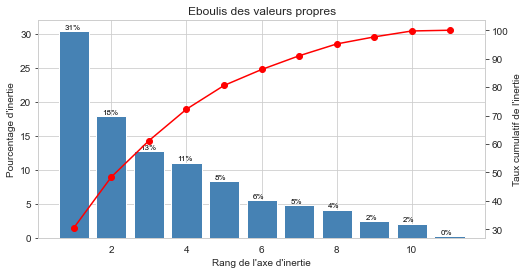

In [49]:

scree_plot(pca)

- Aucun coude sur le graphique de l'éboulis des valeurs propres. Seule la dernière composante n'explique aucune variance. La première composante explique pour 31% la variance totale.

In [50]:
def display_circles(
        pcs,
        n_comp,
        pca,
        axis_ranks,
        labels=None,
        label_rotation=0,
        lims=None,
        width=16,
        n_cols=3):
    """
    Affiche le cercle des corrélations
    Parameters
    ----------
    pcs :
    n_comp :
    pca :
    axis_ranks :
    labels : , optional
            None par défaut.
    label_rotation :, optional
                    0 par défaut.
    lims : , optional
            None par défaut.
    Returns
    -------
    None.
    """
    n_rows = (n_comp + 1) // n_cols
    fig = plt.figure(figsize=(width, n_rows * width / n_cols))
    # boucle sur les plans factoriels (3 premiers plans -> 6 composantes)
    for i, (d1, d2) in enumerate(axis_ranks):
        if d2 < n_comp:
            ax = fig.add_subplot(n_rows, n_cols, i + 1)
            # limites
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])
            # flèches, si plus de 30, pas de pointes
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]),
                           np.zeros(pcs.shape[1]),
                           pcs[d1,
                               :],
                           pcs[d2,
                               :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color='black')
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(
                        lines,
                        alpha=.1,
                        color='black'))
            # noms de variables
            if labels is not None:
                for text, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        ax.text(
                            x,
                            y,
                            labels[text],
                            fontsize='14',
                            ha='center',
                            va='center',
                            rotation=label_rotation,
                            color="black",
                            alpha=0.5)
            # cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='k')
            ax.add_artist(circle)
            # définition des limites du graphique
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            # affichage des lignes horizontales et verticales
            ax.plot([-1, 1], [0, 0], color='black', ls='--')
            ax.plot([0, 0], [-1, 1], color='black', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel(
                'PC{} ({}%)'.format(
                    d1 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d1],
                        1)))
            ax.set_ylabel(
                'PC{} ({}%)'.format(
                    d2 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d2],
                        1)))
            ax.set_title(
                'PCA correlation circle (PC{} and PC{})'.format(
                    d1 + 1, d2 + 1))
    plt.axis('square')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


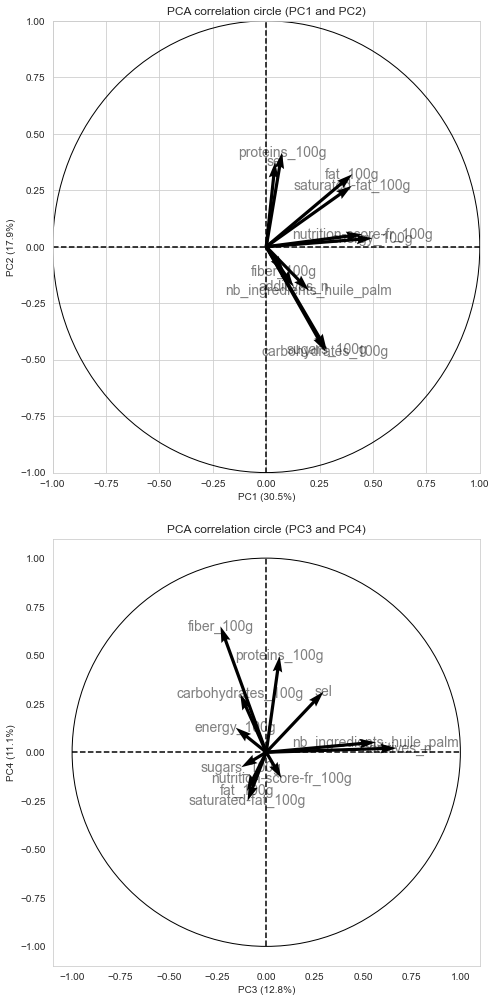

In [51]:
# Affichage du cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1), (2, 3)], labels=np.array(
    features), label_rotation=0, lims=None, width=7, n_cols=1)

In [58]:
columns_

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'sel']

In [52]:
def factorial_planes(
        X_proj,
        n_comp,
        pca,
        axis_ranks,
        couleurs=None,
        labels=None,
        width=16,
        alpha=1,
        n_cols=3,
        illus_var=None,
        lab_on=True,
        size=10):
    """
    Affiche le plan factoriel
    Parameters
    ----------
    X_projected :
    n_comp :
    pca :
    axis_ranks :
    labels : , optional
            None par défaut.
    alpha : , optional
            1 par défaut.
    illustrative_var : , optional
                      None par défaut.
    Returns
    -------
    None.
    """
    n_rows = (n_comp + 1) // n_cols
    fig = plt.figure(figsize=(width, n_rows * width / n_cols))
    # boucle sur chaque plan factoriel
    for i, (d1, d2) in (enumerate(axis_ranks)):
        if d2 < n_comp:
            ax = fig.add_subplot(n_rows, n_cols, i + 1)
            # points
            if illus_var is None:
                ax.scatter(X_proj[:, d1], X_proj[:, d2], alpha=alpha, s=size)
            else:
                illus_var = np.array(illus_var)

                label_patches = []
                colors = couleurs
                i = 0

                for value in np.unique(illus_var):
                    sel = np.where(illus_var == value)
                    ax.scatter(X_proj[sel, d1], X_proj[sel, d2],
                               alpha=alpha, label=value, c=colors[i])
                    label_patch = mpatches.Patch(color=colors[i],
                                                 label=value)
                    label_patches.append(label_patch)
                    i += 1
                    ax.legend(
                        handles=label_patches,
                        bbox_to_anchor=(
                            1.05,
                            1),
                        loc=2,
                        borderaxespad=0.,
                        facecolor='white')
            # labels points
            if labels is not None and lab_on:
                for text_lab, (x, y) in enumerate(X_proj[:, [d1, d2]]):
                    ax.text(x, y, labels[text_lab],
                            fontsize='14', ha='center', va='center')
            # limites
            bound = np.max(np.abs(X_proj[:, [d1, d2]])) * 1.1
            ax.set(xlim=(-bound, bound), ylim=(-bound, bound))
            # lignes horizontales et verticales
            ax.plot([-100, 100], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-100, 100], color='grey', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel(
                'F{} ({}%)'.format(
                    d1 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d1],
                        1)))
            ax.set_ylabel(
                'F{} ({}%)'.format(
                    d2 +
                    1,
                    round(
                        100 *
                        pca.explained_variance_ratio_[d2],
                        1)))
            ax.set_title(
                'Projection des individus (sur F{} et F{})'.format(
                    d1 + 1, d2 + 1))
    plt.grid(False)
    plt.tight_layout()

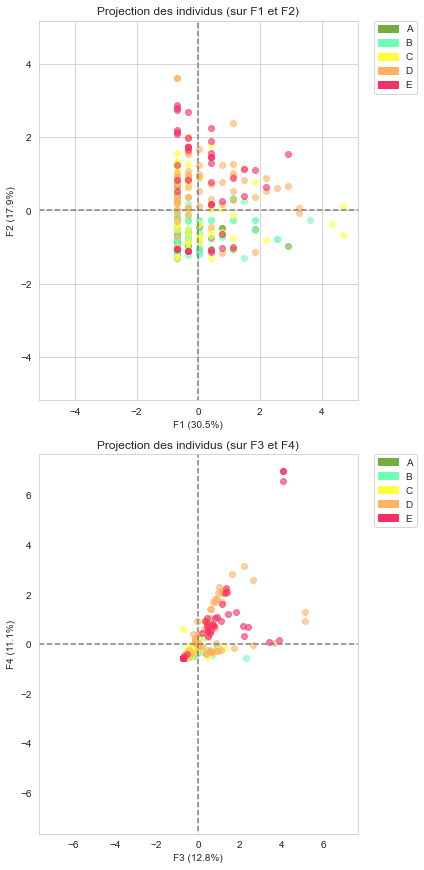

In [53]:
X_ech_index = df_appli_clean.loc[:, cols_acp].sample(300).index
X_ech = df_appli_clean.loc[X_ech_index, cols_acp].values
X_proj_ech = preprocessing.StandardScaler().fit_transform(X_ech)
factorial_planes(X_proj_ech, n_comp, pca, [(0, 1), (2, 3)],
                                    n_cols=1, couleurs=colors,
                                    labels=np.array(X_ech_index), width=6,
                                    illus_var=df_appli_clean.loc[X_ech_index,
                                                       'nutrition_grade_fr'],
                                    lab_on=False, alpha=0.6)

## Conclusion
Le jeu de données contient toutes les données nécessaires à notre idée d'application de recommandations pour les personnes atteintes de L’homocystinurie.

    - protéines,
    - nutri-score,
    - les glucides, lipides, sel, additifs et fibres.

- En effet ces personnes doivent suivre un régime hypoprotidique très strict et quotidien tout en suivant une alimentation saine et équilibrée avec des produits non transformés.

- L'application sera dans un premier temps, un moteur de recommandation : à partir de la recherche d'un produit, la liste des produits les plus sains classés par le nombre de g de protéines le plus faible possible sera proposée, 

**Sauvegarde du jeu de donnée**

In [54]:
df_appli_clean.to_csv('openfoodfacts_clean_appli.csv', sep='\t',index=False)

**Note** :

un prototype dans le dernier notebook PSanté_03_application.ipynb.